In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use("ggplot")

In [2]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


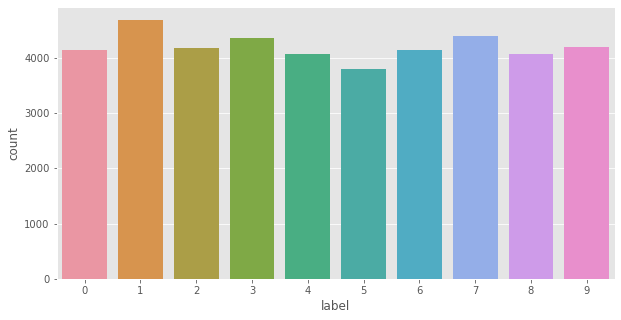

In [5]:
plt.figure(figsize=(10,5))
sns.countplot(df_train["label"])
plt.show()

In [6]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:,:1]

In [7]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000, 1)


In [8]:
X = X / 255.0
df_test = df_test / 255.0

In [9]:
X.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
## Reshape The Data
X = X.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

In [11]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [12]:
y = keras.utils.to_categorical(y,num_classes=10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
## Split The Data into X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [14]:
print(f"X_train.shape : {X_train.shape}")
print(f"X_test.shape : {X_test.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"y_test.shape : {y_test.shape}")

X_train.shape : (37800, 28, 28, 1)
X_test.shape : (4200, 28, 28, 1)
y_train.shape : (37800, 10)
y_test.shape : (4200, 10)


## Define The Model

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax")
])

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
best_model = keras.callbacks.ModelCheckpoint("best_model.h5",save_best_only=True)
history = model.fit(X_train,y_train,epochs=50,verbose=1,validation_data=(X_test,y_test),callbacks=[best_model])

Epoch 1/50
1182/1182 [==============================] - 5s 5ms/step - loss: 0.4588 - accuracy: 0.8566 - val_loss: 0.1416 - val_accuracy: 0.9581
Epoch 2/50
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1626 - accuracy: 0.9520 - val_loss: 0.0973 - val_accuracy: 0.9698
Epoch 3/50
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1215 - accuracy: 0.9644 - val_loss: 0.0756 - val_accuracy: 0.9781
Epoch 4/50
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1009 - accuracy: 0.9704 - val_loss: 0.0707 - val_accuracy: 0.9802
Epoch 5/50
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0872 - accuracy: 0.9743 - val_loss: 0.0653 - val_accuracy: 0.9821
Epoch 6/50
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0793 - accuracy: 0.9763 - val_loss: 0.0665 - val_accuracy: 0.9831
Epoch 7/50
1182/1182 [==============================] - 5s 4ms/step - loss: 0.0704 - accuracy: 0.9791 - val_loss: 0.0629 - val_accuracy:

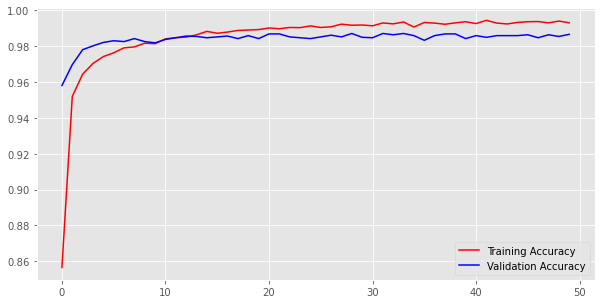

<Figure size 432x288 with 0 Axes>

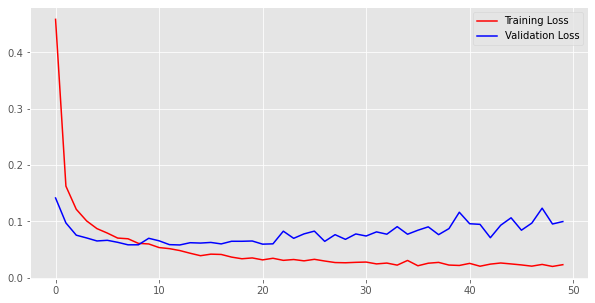

In [18]:
plt.figure(figsize=(10,5))

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs,acc,"r",label="Training Accuracy")
plt.plot(epochs,val_acc,"b",label="Validation Accuracy")

plt.legend()
plt.figure()

plt.figure(figsize=(10,5))

plt.plot(epochs,loss,"r",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")

plt.legend()
plt.show()